## Problem 1 - Linear Separability

### Answer 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

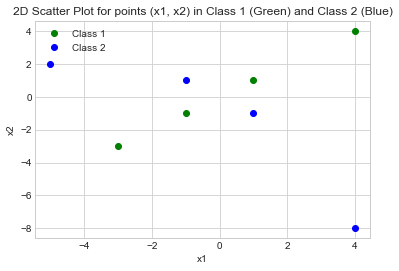

In [2]:
x_class_1 = np.array([-1, 1, -3, 4])
y_class_1 = np.array([-1, 1, -3, 4])

x_class_2 = np.array([-1, 1, -5, 4])
y_class_2 = np.array([1, -1, 2, -8])

plt.plot(x_class_1, y_class_1, 'o', color='green', label='Class 1')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.plot(x_class_2, y_class_2, 'o', color='blue', label='Class 2')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.title('2D Scatter Plot for points (x1, x2) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

Let the first set of points belongs to Class 1 and the other set belongs to Class 2.

Green points denote Class 1 while Blue Points denote Class 2. $x_1$ is the horizontal dimension while $x_2$ is the vertical one.

We can see from the plot above that the dataset $\text{IS NOT LINEARLY SEPARABLE}$ using any linear function/classifier, given only two features $ x_1$ and $x_2$ (without further transformation into a higher space). 


### Answer 1.2

Looking at the points from Class 1 and Class 2, we could see that:
1. $x_1$ and $x_2$ in Class 1 are of the same sign
2. $x_1$ and $x_2$ in Class 2 are of the opposite sign

Thus, we could propose some $z$ such as: $${z = x_1 * x_2}$$

This is linearly separable because Class 1 will all have positive values of $z$ while Class 2 will all have negative values of $z$.

### Answer 1.3

Suppose we have a 1D plane which plots $z$ for Class 1 and Class 2. Green lines denote Class 1 while Blue Points denote Class 2.

The separating hyperplane (or point, because this is 1D) is simply $z=c$, where $c$ is any constant satisfying $-1 < c < 1$. I pick $c=0$, which is denoted by the thick and short red line in the plot.

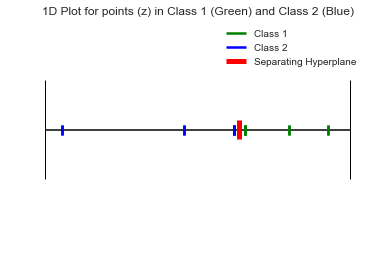

In [3]:
z_class_1 = np.multiply(x_class_1, y_class_1)
z_class_2 = np.multiply(x_class_2, y_class_2)

z_class_1 = np.repeat(z_class_1, 2)
z_class_2 = np.repeat(z_class_2, 2)

plt.figure()
plt.hlines(1, -35, 20)  

plt.eventplot(z_class_1, orientation='horizontal', colors='green', linelengths=0.1, linewidths=2.5, label='Class 1')
plt.eventplot(z_class_2, orientation='horizontal', colors='blue', linelengths=0.1, linewidths=2.5, label='Class 2')

plt.eventplot([-35, 20], orientation='horizontal', colors='black', linelengths=1, linewidths=1)
plt.eventplot([0], orientation='horizontal', colors='red', linelengths=0.2, linewidths=5, label='Separating Hyperplane')

plt.axis('off')

plt.title('1D Plot for points (z) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

### Answer for Problem 1.4

Because ...

## Problem 2 - Bias Variance Tradeoff, Regularization

### Answer 2.1

$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t(f(x_i) + \epsilon - g(x_i))^2] $$

Introduce terms $E[g(x_i]$ that will cancel each other:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i) + \epsilon - g(x_i) + E[g(x_i)] - E[g(x_i)])^2] $$

Using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(f(x_i) - E[g(x_i)])] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(E[g(x_i)] - g(x_i))] + \frac{2}{t} \sum_{i=1}^t E[((f(x_i) - E[g(x_i))(E[g(x_i)] - g(x_i))]] $$

Notice that $E[g(x_i)] = g(x_i)$, so that lefts us with:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

Again, using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2] + E[\frac{1}{t} \sum_{i=1}^t E[\epsilon^2]] + E[\frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{1}{t}(t) E[\epsilon^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + E[\epsilon^2]$$

Finally:
$$ E[MSE] = Bias[g(x)]^2 + Var[g(x)] + Noise $$

where:
1. $$ Bias[g(x)]^2 = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 $$
2. $$ Var[g(x)] = \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2 $$
3. $$ Noise = E[\epsilon^2] $$

### Answer 2.2

The black line plot depicts $f(x)$ while the red dots (20 in total) are the samples drawn from $y(x)$. 

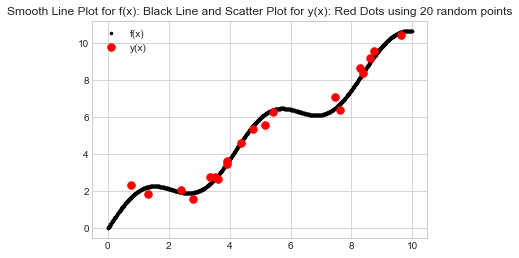

In [4]:
def f_x(x):
    return x + np.sin((3/2)*x)

x_smooth = np.arange(0, 10, 0.01)
f_x_plot_dots = f_x(x_smooth)

def generate_sample_from_y(x_rand):    
    return f_x(x_rand) + np.random.normal(0, 0.3, len(x_rand))
    
x_rand = np.random.uniform(0, 10, 20)
y_x_plot_dots = generate_sample_from_y(x_rand)


plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_rand, y_x_plot_dots, 'o', color='red', markersize=7.5, label='y(x)')

plt.title('Smooth Line Plot for f(x): Black Line and Scatter Plot for y(x): Red Dots using 20 random points')
plt.legend()
plt.show()

### Answer 2.3

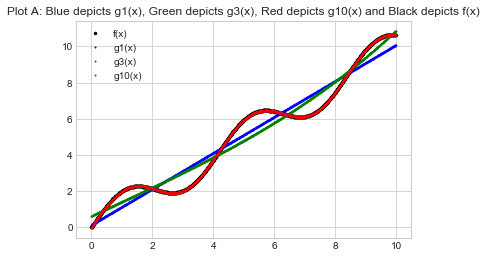

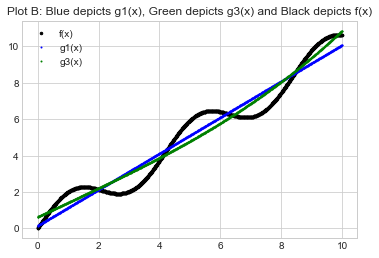

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

reshape_x_smooth = x_smooth.reshape(-1, 1)

g_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
g_1.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
g_3.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
g_10.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')
plt.plot(x_smooth, g_10.predict(reshape_x_smooth), 'o', color='red', markersize=1, label='g10(x)')

plt.title('Plot A: Blue depicts g1(x), Green depicts g3(x), Red depicts g10(x) and Black depicts f(x)')
plt.legend()
plt.show()

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')

plt.title('Plot B: Blue depicts g1(x), Green depicts g3(x) and Black depicts f(x)')
plt.legend()
plt.show()

In the first plot, Plot A, we can see that $g_1(x)$ (blue line) and $g_2(x)$ (green line) are underfitting while $g_{10}(x)$ (red line) is overfitting. $f(x)$, which is the black line, is fully overlayed by $g_{10}(x)$, the red line.

To make it clearer, I provide Plot B, in which I get ride of $g_10(x)$, i.e. the red line. We can compare that $g_10(x)$ resembles $f(x)$ quiet a lot, indicating overfitting.

### Answer 2.4

In [6]:
# Generate fixed 50 x_rand(s)
x_rand = np.random.uniform(0, 10, 50)

# Divide into x_train and x_test
x_train = x_rand[0:40]
x_test = x_rand[40:50]

# 
y_train = []
y_test = []

# Generate y_train and y_test

for i in range(0, 100):
    y_x_plot_dots = generate_sample_from_y(x_rand)
    y_train.append(y_x_plot_dots[0:40])
    y_test.append(y_x_plot_dots[40:50])

# for degree in range(1, 16):
#     g = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#     g.fit(x_train, y_train)

### Answer 2.5

## Problem 3

### Answer 3.1

Two datasets picked:
    
1. energy-efficiency (https://www.openml.org/d/1472)
2. optdigits (https://www.openml.org/d/28)

In [7]:
import numpy as np
import pandas as pd

d1_path = 'data/energy-efficiency.csv'
d1_name = 'Energy Efficiency'

t_df = pd.read_csv(d1_path)
t_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,y1,y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,7,11
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,7,11
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,7,11
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,7,11
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,12,18


In [8]:
d2_path = 'data/optdigits.csv'
d2_name = 'Opt Digits'

i_df = pd.read_csv(d2_path)
i_df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


#### Function to Summarize Attributes from a Dataset

In [9]:
def get_attribute_summary(df, class_column, dname):
    df_info = {}

    df_info['num_features'] = len(df.columns) - 1 # excluding label column
    df_info['num_instances'] = len(df)
    df_info['num_classes'] = len(np.unique(df[class_column]))

    df_info['num_numerical_features'] = 0
    df_info['num_categorical_features'] = 0
    
    df_info['categorical_indexes'] = []

    sample_data = df.drop(columns=[class_column]).iloc[0]

    idx = 0
    for val in sample_data:
        try:
            float_form = float(val)

            # If succeeds then it is a numerical object (int can also be converted to float)
            df_info['num_numerical_features'] = df_info['num_numerical_features'] + 1
        except:
            # Otherwise, it is a categorical feature
            df_info['num_categorical_features'] = df_info['num_categorical_features'] + 1
            df_info['categorical_indexes'].append(idx)
            
        idx = idx + 1

    # Some sanity check
    assert df_info['num_numerical_features'] + df_info['num_categorical_features'] == df_info['num_features']

    print('Summary of {} dataset attributes: '.format(dname))
    print('Number of features: {}'.format(df_info['num_features']))
    print('Number of instances: {}'.format(df_info['num_instances']))
    print('Number of classes: {}'.format(df_info['num_classes']))
    print('Number of numerical features: {}'.format(df_info['num_numerical_features']))
    print('Number of categorical features: {}'.format(df_info['num_categorical_features']))
    
    return df_info

#### Attribute Summary for Dataset 1

In [11]:
d1_classname = 'y1'  

# Even though y2 contains integer, but it is stated as a nominal variable
# in the dataset explanation (see https://www.openml.org/d/1472)
# Thus, I add some string prefix so it will count as nominal
t_df['y2'] = 'str' + t_df['y2'].astype(str)

d1_info = get_attribute_summary(t_df, d1_classname, d1_name)

Summary of Energy Efficiency dataset attributes: 
Number of features: 9
Number of instances: 768
Number of classes: 37
Number of numerical features: 8
Number of categorical features: 1


#### Attribute Summary for Dataset 2

In [12]:
d2_classname = 'class'
d2_info = get_attribute_summary(i_df, d2_classname, d2_name)

Summary of Opt Digits dataset attributes: 
Number of features: 64
Number of instances: 5620
Number of classes: 10
Number of numerical features: 64
Number of categorical features: 0


### Answer 3.2

#### Split Both Dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split

t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(t_df.drop(columns=[d1_classname]), t_df[d1_classname], test_size=0.2, random_state=28)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(i_df.drop(columns=[d2_classname]), i_df[d2_classname], test_size=0.2, random_state=28)


#### Generate 10 Different Train Sets

In [14]:
def generate_ten_subsamples(X_train, y_train):
    X_train_sets = []
    y_train_sets = []
    
    for i in range(1, 11):
        frac = i * 10 / 100

        # Use the same random state so that we get matching X_train and y_train
        X_train_sets.append(X_train.sample(frac=frac, random_state=28))
        y_train_sets.append(y_train.sample(frac=frac, random_state=28))
        
    return X_train_sets, y_train_sets

t_X_train_sets, t_y_train_sets = generate_ten_subsamples(t_X_train, t_y_train)
i_X_train_sets, i_y_train_sets = generate_ten_subsamples(i_X_train, i_y_train)

#### Function to Convert Categorical Features into Numerical Ones 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

def convert_categorical(df, categorical_indexes):
    columnTransformer = ColumnTransformer([('encoder', 
                                            OneHotEncoder(), 
                                            categorical_indexes)], 
                                            remainder='passthrough') 
    
    return columnTransformer.fit_transform(df)
    
def convert_all_sets(X_train_sets, categorical_indexes):
    new_X_train_sets = []
    
    for X_train_set in X_train_sets:
        new_X_train_set = convert_categorical(X_train_set, categorical_indexes)
        new_X_train_sets.append(new_X_train_set)
        
    return new_X_train_sets

#### Convert Categorical Features in Both Dataset, Both Train and Test

In [ ]:
new_t_X_train_sets = convert_all_sets(t_X_train_sets, d1_info['categorical_indexes'])
new_i_X_train_sets = convert_all_sets(i_X_train_sets, d2_info['categorical_indexes'])
    
new_t_X_test = convert_categorical(t_X_test, d1_info['categorical_indexes'])
new_i_X_test = convert_categorical(i_X_test, d2_info['categorical_indexes'])

#### Function to Train Dataset using Random Forests and Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from datetime import datetime, timedelta

def run_train_scenario(dname, X_train_sets, y_train_sets):
    i = 0
    
    rf_models = []
    gb_models = []
    
    rf_training_times = []
    gb_training_times = []
    
    for X_train, y_train in list(zip(X_train_sets, y_train_sets)):
        rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=28)
        gb = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=28)
    
        start = datetime.now()
        rf.fit(X_train, y_train)
        rf_training_times.append((datetime.now() - start).total_seconds())
        rf_models.append(rf)
        
        start = datetime.now()
        gb.fit(X_train, y_train)
        gb_training_times.append((datetime.now() - start).total_seconds())
        gb_models.append(gb)
        
        i = i + 1
        total_time_elapsed = rf_training_times[len(rf_training_times) - 1] + gb_training_times[len(gb_training_times) - 1]
        print('Finished {} training for subsample {}, total time elapsed: {}'.format(dname, i, total_time_elapsed))
        
    return rf_models, gb_models, rf_training_times, gb_training_times

#### Run Training on Dataset 1

In [ ]:
t_rf_models, t_gb_models, t_rf_training_times, t_gb_training_times = run_train_scenario(d1_name, new_t_X_train_sets, t_y_train_sets)

#### Run Training with Dataset 2

In [ ]:
i_rf_models, i_gb_models, i_rf_training_times, i_gb_training_times = run_train_scenario(d2_name, new_i_X_train_sets, i_y_train_sets)

#### Create function to Compute Accuracies on Test Set

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_test_accuracies(clf_list, X_test, y_test):
    accuracies = []
    
    for clf in clf_list:
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return accuracies

#### Compute Test Accuracies on Dataset 1

In [ ]:
t_rf_accuracies = calculate_test_accuracies(t_rf_models, new_t_X_test, t_y_test)
t_gb_accuracies = calculate_test_accuracies(t_gb_models, new_t_X_test, t_y_test)
print(t_rf_accuracies)
print(t_gb_accuracies)

#### Compute Test Accuracy on Dataset 2

In [ ]:
i_rf_accuracies = calculate_test_accuracies(i_rf_models, i_X_test, i_y_test)
i_gb_accuracies = calculate_test_accuracies(i_gb_models, i_X_test, i_y_test)
print(i_rf_accuracies)
print(i_gb_accuracies)

#### Plot Test Accuracies and Training Times for Dataset 1

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Plot Test Accuracies and Training Times for Dataset 2

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

## Answer 4.3

There are three main observations that I find:

1. For